In [1]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import tensorflow.keras.utils as utils

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D

In [6]:
 data_path = 'data/ckplus/CK+48'

In [7]:
data_dir_list = os.listdir(data_path)
#data_dir_list
print(str(len(data_dir_list))+' classes are',data_dir_list)

7 classes are ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [8]:
img_data = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)
        
        img = cv2.resize(img,(48,48))
        
        img_data.append(img)
        

number of images in anger =  135
number of images in contempt =  54
number of images in disgust =  177
number of images in fear =  75
number of images in happy =  207
number of images in sadness =  84
number of images in surprise =  249


In [9]:
img_data = np.array(img_data)
img_data[0].shape

(48, 48, 3)

In [10]:
img_data.shape

(981, 48, 48, 3)

In [11]:
# Normalization (essential for neural nets)
img_data = img_data.astype('float32')
img_data = img_data/255

In [12]:
img_data.shape

(981, 48, 48, 3)

In [13]:
print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

shape of image (48, 48)
num of images  981


In [14]:
label_text = {0:'anger', 1:'contempt', 2: 'contempt',
                         3:'fear', 4:'happiness',
                         5: 'sadness', 6: 'surprise'}

In [15]:
labels = np.ones((img_data.shape[0],),dtype='int64')

In [16]:
labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177

labels[366:440]=3 #75
labels[441:647]=4 #207

labels[648:731]=5 #84
labels[732:980]=6 #249

In [17]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
#     axes = axes.flatten()
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()
    

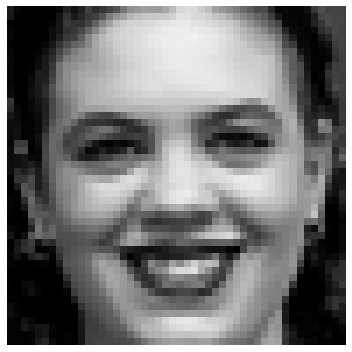

happiness


In [18]:
plotImages(img_data[600])
print(label_text[labels[600]])

In [19]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    return model

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score

In [22]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearrest')

In [26]:
from tensorflow.keras.optimizers import *

In [27]:
x,y = shuffle(img_data,Y,random_state = 3)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [29]:
Y = utils.to_categorical(labels, len(dataset)-1)
print(len(Y))
Y

981


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
len(img_data)

981

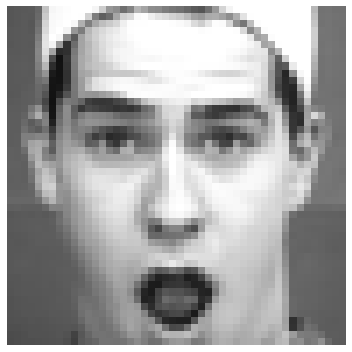

[0. 0. 0. 0. 0. 0. 1.]


In [31]:
plotImages(x[0])
print(y[0])

In [32]:
# from sklearn.model_selection import KFold

In [33]:
# kf = KFold(n_splits=5, shuffle=False)

In [34]:
aug.fit(X_train)

In [35]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [36]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(0.001),
]


model = create_model(optims[1]) 




In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [38]:
model.fit(x=X_train, y= y_train, validation_split=0.1, batch_size=32, 
          epochs=100, shuffle=True, verbose=2, callbacks=callbacks 
         )

Epoch 1/100
23/23 - 1s - loss: 1.8314 - accuracy: 0.2567 - val_loss: 1.7486 - val_accuracy: 0.2532
Epoch 2/100
23/23 - 1s - loss: 1.7708 - accuracy: 0.3121 - val_loss: 1.6767 - val_accuracy: 0.3165
Epoch 3/100
23/23 - 1s - loss: 1.6179 - accuracy: 0.4043 - val_loss: 1.4187 - val_accuracy: 0.4557
Epoch 4/100
23/23 - 1s - loss: 1.3359 - accuracy: 0.5092 - val_loss: 1.1353 - val_accuracy: 0.5823
Epoch 5/100
23/23 - 1s - loss: 1.1482 - accuracy: 0.5589 - val_loss: 0.9913 - val_accuracy: 0.6329
Epoch 6/100
23/23 - 1s - loss: 0.9731 - accuracy: 0.6369 - val_loss: 0.8014 - val_accuracy: 0.7722
Epoch 7/100
23/23 - 1s - loss: 0.8787 - accuracy: 0.6723 - val_loss: 0.7090 - val_accuracy: 0.7848
Epoch 8/100
23/23 - 1s - loss: 0.8417 - accuracy: 0.6950 - val_loss: 0.6416 - val_accuracy: 0.7342
Epoch 9/100
23/23 - 1s - loss: 0.6714 - accuracy: 0.7433 - val_loss: 0.5970 - val_accuracy: 0.8228
Epoch 10/100
23/23 - 1s - loss: 0.6323 - accuracy: 0.7702 - val_loss: 0.5719 - val_accuracy: 0.8861
Epoch 11/

In [39]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [40]:
import seaborn as sns
import pandas as pd

In [41]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [42]:
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

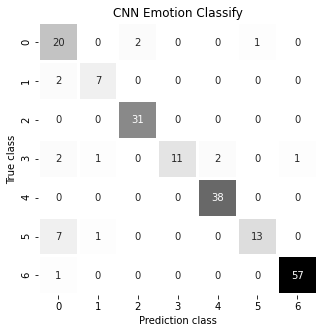

In [43]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [44]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)

Test Loss: 0.30213403701782227
Test accuracy: 0.8984771370887756
(1, 48, 48, 3)
[[8.39535713e-01 7.76557578e-03 1.24645315e-01 1.83928394e-04
  2.53597368e-03 2.52125170e-02 1.21115154e-04]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


In [45]:
 from sklearn.metrics import multilabel_confusion_matrix


In [46]:
y_pred = (y_pred>0.5)
multilabel_confusion_matrix(y_test, y_pred )

array([[[168,   6],
        [  3,  20]],

       [[188,   0],
        [  6,   3]],

       [[165,   1],
        [  0,  31]],

       [[180,   0],
        [  8,   9]],

       [[158,   1],
        [  0,  38]],

       [[176,   0],
        [ 11,  10]],

       [[139,   0],
        [  1,  57]]], dtype=int64)

In [47]:
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))

number of images in anger =  135
number of images in contempt =  54
number of images in disgust =  177
number of images in fear =  75
number of images in happy =  207
number of images in sadness =  84
number of images in surprise =  249


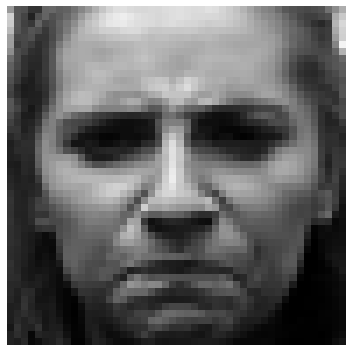

anger


In [48]:
plotImages(X_test[3])
ans = int(model.predict_classes(test_image)[0])
print(label_text[ans])

In [49]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

(1, 48, 48, 3)


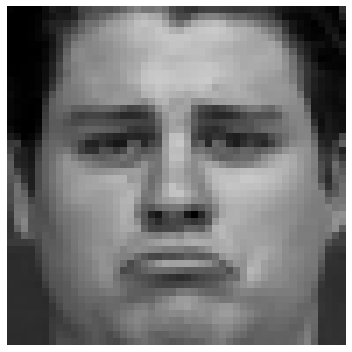

In [50]:
test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])

In [51]:
model.predict_classes(test_img)

array([5], dtype=int64)

In [52]:
y_test[1:2]

array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [53]:
xx = []
xx

[]

In [54]:
import imageio

In [56]:
pic = imageio.imread('ex7.jpeg')

In [57]:
pic.shape

(184, 273, 3)

In [58]:
pic = cv2.resize(pic,(48,48))

In [59]:
xx.append(pic)

In [60]:
xx = np.array(xx)
xx = xx.astype('float32')
xx = xx/255

In [61]:
xx.shape

(1, 48, 48, 3)

In [62]:
model.predict_classes(xx)[0]

0

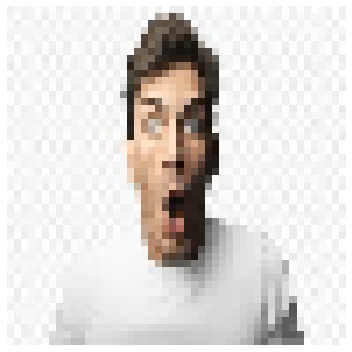

In [63]:
plotImages(pic)

In [64]:
data_dir_list

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']